# Integración por Montecarlo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import math

## Hit and miss

3.136


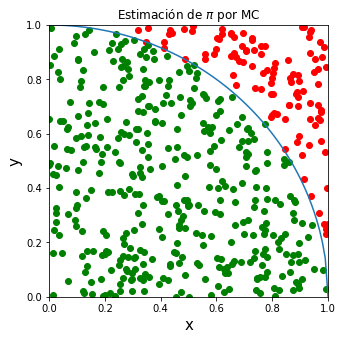

In [148]:
plt.figure(figsize=(5,5))

Na = 0
N = 500
for i in range(N):
    x = rd.uniform(0,1)
    y = rd.uniform(0,1)
    if x**2+y**2<1:
        plt.scatter(x,y,c='green')
        Na += 1
    else:
        plt.scatter(x,y,c='red')

pi = 4*Na/N
print(pi)

t = np.linspace(0,1,100)
circ = np.sqrt(1-t**2)
plt.plot(t,circ)
plt.xlim(left=0, right=1)
plt.ylim(bottom=0,top=1)
plt.xlabel('x',size = '15')
plt.ylabel('y', size = '15')
plt.title('Estimación de $\pi$ por MC')
plt.savefig('piaprox.pdf')
plt.show()


## Error en Pi

Usando el método de Hit and Miss, hago estadística estimando $\pi$ 20 veces para cada valor de $N$, que va exponencialmente entre 10 y $10^{6}$. Se verifica que el error va como $\frac{1}{\sqrt{N}}$

In [21]:
N = np.zeros((6))                       #Creo un array con los valores de N
for i in range(6):
    N[i] = 10**(i+1)

means = []
varss = []
times = []

for k in N:
    listapi = []                         #Guardo los valores calculados de pi para cara valor de N
    n = int(k)
    for j in range(50):                  #Montecarlo
        Na = 0
        for i in range(n):
            x = rd.uniform(0,1)
            y = rd.uniform(0,1)
            if (x**2+y**2)<1:
                Na = Na + 1
        pi = 4*Na/n
        listapi = np.append(listapi,pi)
        
    mean = np.mean(listapi)              #Calculo el promedio, la varianza
    means = np.append(means,mean)
    var = np.var(listapi)    #la varianza, 
    varss = np.append(varss,var)

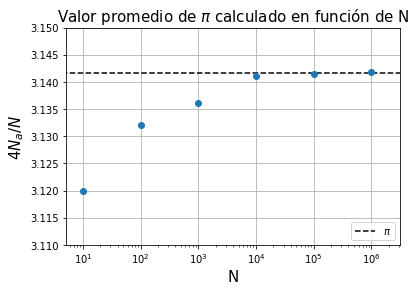

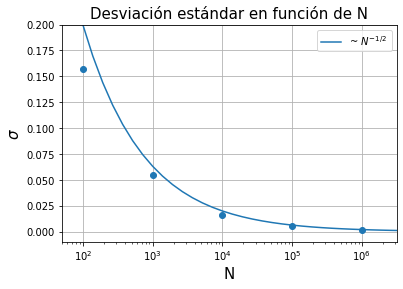

In [28]:
plt.figure()
plt.scatter(N,means,zorder = 5)
plt.title('Valor promedio de $\pi$ calculado en función de N',size='15')
plt.xlabel('N',size='15')
plt.ylabel('$4 N_a / N$',size='15')
plt.xscale('log')
plt.hlines(np.pi,0,10**7, linestyles='dashed',label='$\pi$')
plt.xlim(right=10**(6.5))
plt.ylim(bottom=3.11, top = 3.15)
plt.grid()
plt.savefig('convpi.pdf')
plt.legend(loc = 'lower right')

t = np.logspace(0,7,base=10)
Y = 2*t**(-1/2)

plt.figure()
plt.plot(t,Y,label= '~ $N^{-1/2}$')
plt.scatter(N,np.sqrt(varss),zorder = 5)
plt.title('Desviación estándar en función de N',size='15')
plt.grid()
plt.xlabel('N',size='15')
plt.ylabel('$\sigma$', size='15')
plt.xlim(left= 50, right = 10**(6.5))
plt.ylim(bottom=-0.01,top = 0.2)
plt.xscale('log')
plt.savefig('errorpi.pdf')
plt.legend()

# Comparación de métodos:

## MC regular

In [2]:
def f(x,y,z):
    w = np.exp(-x**2-y**2-z**2)
    return(w)

def Montecarlo(f,N,n,ax,bx,ay,by,az,bz):
    In = np.zeros(n)
    for j in range(n):
        suma = 0
        for i in range(N):
            x = rd.uniform(ax,bx)
            y = rd.uniform(ay,by)
            z = rd.uniform(az,bz)
            F = f(x,y,z)
            suma += F
        In[j] = ((bx-ax)*(by-ay)*(bz-az)*suma)/N
    return(np.mean(In),np.var(In))

Montecarlo(f,10000,20,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)

(5.592729613582799, 0.056946867487814044)

## Sampleo estratificado

In [3]:
def strat(f,N,n,k,ax,bx,ay,by,az,bz):
    if N<k**3:
        return('N<k**3')
    else:
        In = np.zeros(n)
        for j in range(n):
            Kx = np.linspace(ax,bx,k)
            Ky = np.linspace(ay,by,k)
            Kz = np.linspace(az,bz,k)
            suma = 0
            for kx in range(k-1):
                for ky in range(k-1):
                    for kz in range(k-1):
                        suma += Montecarlo(f,int(N/k**3),1,Kx[kx],Kx[kx+1],Ky[ky],Ky[ky+1],Kz[kz],Kz[kz+1])[0]
            In[j] = suma
    return(np.mean(In),np.var(In))

strat(f,10000,20,5,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)

(5.613056198289856, 0.055705369822369274)

## Variables antitéticas

In [4]:
def anti(f,N,n,ax,bx,ay,by,az,bz):
    In = np.zeros(n)
    for j in range(n):
        suma = 0
        for i in range(N):
            x = rd.uniform(ax,bx)
            y = rd.uniform(ay,by)
            z = rd.uniform(az,bz)
            suma += f(x,y,z)+f(-x,-y,-z)
        In[j] = (bx-ax)*(by-ay)*(bz-az)*suma/(2*N)
    return(np.mean(In),np.var(In))

anti(f,10000,20,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)

(5.499761382984909, 0.05235918305249383)

## Variables de control

In [5]:
def control(f,g,Ig,N,n,ax,bx,ay,by,az,bz):
    In = np.zeros(n)
    for j in range(n):
        def fg(x,y,z):
            w = f(x,y,z)-g(x,y,z)
            return(w)
        In[j] = Montecarlo(fg,N,1,ax,bx,ay,by,az,bz)[0] +Ig
    return(np.mean(In),np.var(In))

def g(x,y,z):
    w = 1/((x**2+1)*(y**2+1)*(z**2+1))
    return(w)

control(f,g,2.5253**3,10000,20,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)

(5.551032586974072, 0.010247683120932594)

## Sampleo por importancia

In [6]:
def imp(f,p,N,n,ax,bx,ay,by,az,bz):
    In = np.zeros(n)
    for j in range(n):
        suma = 0
        for i in range(N):
            x = np.random.standard_cauchy()
            y = np.random.standard_cauchy()
            z = np.random.standard_cauchy()
            suma += f(x,y,z)/p(x,y,z)
        In[j] = suma/N
    return(np.mean(In),np.var(In))
def p(x,y,z):
    w = 1/((x**2+1)*(y**2+1)*(z**2+1)*np.pi**3)
    return(w)

imp(f,p,10000,5,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)

(5.640436025565391, 0.0030886205065859588)

## Cuadraturas

In [7]:
def riem(f,N,ax,bx,ay,by,az,bz):
    n = int(N**(1/3))
    
    x = np.linspace(ax,bx,n)
    y = np.linspace(ay,by,n)
    z = np.linspace(az,bz,n)
    
    suma = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                suma += f(x[i],y[j],z[k])
    return((bx-ax)*(by-ay)*(bz-az)*suma/N)
                
        
riem(f,1000000,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)    

5.24075365454738

In [8]:
N = [1000,5000,10000,50000,100000,500000,1000000]
Z = len(N)

mclista = np.zeros(Z)
mcvar = np.zeros(Z)

stratlista = np.zeros(Z)
stratvar = np.zeros(Z)

antilista = np.zeros(Z)
antivar = np.zeros(Z)

controlista = np.zeros(Z)
controvar = np.zeros(Z)

implista = np.zeros(Z)
impvar = np.zeros(Z)

riemlista = np.zeros(Z)

for m in range(Z):
    mclista[m], mcvar[m] = Montecarlo(f,N[m],80,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)
    stratlista[m], stratvar[m] = strat(f,N[m],80,4,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)
    antilista[m], antivar[m] = anti(f,N[m],80,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)
    controlista[m], controvar[m] = control(f,g,2.5253**3,N[m],80,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)
    implista[m], impvar[m] = imp(f,p,N[m],80,-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)
    riemlista[m] = riem(f,N[m],-np.pi,np.pi,-np.pi,np.pi,-np.pi,np.pi)  

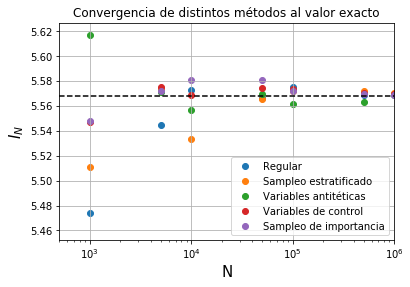

In [16]:
Iex = (np.sqrt(np.pi)*math.erf(np.pi))**3

plt.scatter(N,mclista,label='Regular')
plt.scatter(N,stratlista,label='Sampleo estratificado')
plt.scatter(N,antilista,label='Variables antitéticas')
plt.scatter(N,controlista,label='Variables de control')
plt.scatter(N,implista,label='Sampleo de importancia')
plt.xlim(left=500,right=N[-1])
plt.legend()
plt.hlines(y=Iex,xmin= 500, xmax = N[-1], linestyle='dashed')
plt.grid(True)
plt.xscale('log')
plt.xlabel('N', size='15')
plt.ylabel('$I_{N}$', size = '15')
plt.title('Convergencia de distintos métodos al valor exacto')
plt.savefig('comp.pdf')

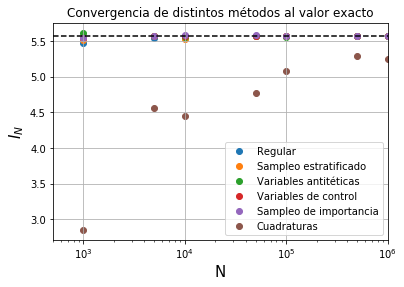

In [17]:
plt.title('Montecarlo vs cuadraturas')

plt.scatter(N,mclista,label='Regular')
plt.scatter(N,stratlista,label='Sampleo estratificado')
plt.scatter(N,antilista,label='Variables antitéticas')
plt.scatter(N,controlista,label='Variables de control')
plt.scatter(N,implista,label='Sampleo de importancia')
plt.scatter(N,riemlista,label='Cuadraturas')
plt.xlim(left=500,right=N[-1])
plt.legend()
plt.hlines(y=Iex,xmin= 500, xmax = N[-1], linestyle='dashed')
plt.grid(True)
plt.xscale('log')
plt.xlabel('N', size='15')
plt.ylabel('$I_{N}$', size = '15')
plt.title('Convergencia de distintos métodos al valor exacto')
plt.savefig('compriemann.pdf')

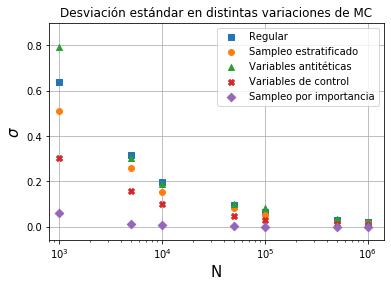

In [18]:
plt.grid(True)
plt.scatter(N,np.sqrt(mcvar), marker='s',label ='Regular',zorder=5)
plt.scatter(N,np.sqrt(stratvar), marker='o', label='Sampleo estratificado',zorder=5)
plt.scatter(N,np.sqrt(antivar), marker='^' , label ='Variables antitéticas',zorder=5)
plt.scatter(N,np.sqrt(controvar), marker = 'X',label='Variables de control',zorder=5)
plt.scatter(N,impvar, marker = 'D', label='Sampleo por importancia',zorder=5)
plt.legend()
plt.xscale('log')
plt.xlim(left=800)
plt.ylim(top=0.9)
plt.xlabel('N',size='15')
plt.ylabel('$\sigma$',size='15')
plt.title('Desviación estándar en distintas variaciones de MC')
plt.savefig('errcomp.pdf')